# Lista de Exercício 4
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste de 4 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2021/blob/master/praticas/Lista_de_Exercicio_4.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/praticas/Lista_de_Exercicio_4.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: `

`Número USP: `

### Introdução:

Nesta lista de exercício estudaremos as transformações por vizinhança. Essas transformações se dão por meio da combinação das intensidades de um certo número de pixels (janela ou *kernel*), a fim de computar o valor da nova intensidade na imagem de saída. A Figura 1 ilustra como se da esse processo através da convolução espacial.

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_04/convolucao.gif" style="width:650px;height:300px;"></center>

<center><caption><b> Figura 1:</b> Ilustração da convolução de um filtro em uma imagem.</b></caption></center>

Na figura acima foi utilizado um *kernel* do tipo:

\begin{equation}
K = 
\begin{bmatrix}
1 & 0 & 1\\
0 & 1 & 0\\
1 & 0 & 1
\end{bmatrix}
\end{equation}

Quando o filtro está na primeira posição, a equação matemática para se obter o valor 4 é dada por:

$$g(x,y) = 1 \times 1  +  0 \times 1  + 1 \times 1  + 0 \times 0  + 1 \times 1  + 0 \times 1  + 1 \times 0  + 0  \times 0  + 1 \times 1.$$

É importante notar que no domínio do espaço a diferença entre a Convolução e a Correlação Cruzada reside apenas no espelhamento do Template (*kernel*) a ser utilizado, que deve ser feito na Convolução. Como, em geral, os Templates são simétricos, a equação da Correlação Cruzada tem sido empregada com o nome de Convolução na área de Processamento de Imagens.

Como pode ser observado na animação acima, caso a borda da imagem não seja tratada, a imagem resultante tem um tamanho menor. Esse tamanho pode ser calculado por meio da equação:

$$ g_n = n + 2 \times p - k + 1,$$

onde $n$ é o número de linhas da imagem original, $p$ o número de pixels utilizados no *padding* e $k$ é o tamanho do *kernel* (geralmente quadrado). No caso acima, $n = 5$, $p = 0$ e $k = 3$, resultando em uma imagem de $3\times3$. Para evitar esse problema é necessário utilizar o *padding* com o valor $p = 1$. O mesmo se dá para as colunas da imagem. 

Referências:

*   Material da sala de aula;
*   OpenCV: [Smoothing Images](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html).

Vamos importar as bibliotecas que iremos utilizar:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

from scipy.io import loadmat
from IPython.display import HTML
from base64 import b64encode

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática. 

In [ ]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_04/faceMask.mat", "faceMask.mat")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_04/obama.mp4", "obama.mp4")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_04/armadura.tif", "armadura.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_04/pontos.tif", "pontos.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_04/board.tif", "board.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

### 1) Filtro passa-alta.

1.1) Filtro de aguçamento

**Exercício:**

1. Aplique o *kernel* de um filtro espacial passa-alta na imagem ```armadura.tif``` a fim de adquirir as altas frequências da imagem. Apresente a imagem resultante, e se preferir também o seu negativo.

2. Modifique esse *kernel* a fim de torná-lo um filtro de aguçamento e aplique-o na imagem. Apresente a imagem resultante e comente os resultados.


*Dicas:* 

*    Considere o exemplo do *kernel* $K$ de um filtro espacial da média apresentado abaixo:
    \begin{equation}
    K = \frac{1}{9}
    \begin{bmatrix}
    1 & 1 & 1\\
    1 & 1 & 1\\
    1 & 1 & 1
    \end{bmatrix}
    \end{equation}

    Pode-se utilizar a declaração de array da biblioteca *numpy* para declarar K como uma matriz da seguinte maneira:

    ``` python
    kernel = np.array(((1, 1, 1), 
                        (1, 1, 1),
                        (1, 1, 1))) / 9
    ```

*   Utilize a função [cv.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) para fazer a convolução com o *kernel*. 

    *Ex:*
    ``` python
    cv.filter2D(myImg, -1, myKernel)
    ```

In [ ]:
## -- Seu código começa AQUI -- ##

## -- Seu código termina AQUI -- ##

1.2) Filtro para detecção de pontos isolados

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_04/pontos.tif" style="width:50px;height:50px;"></center>

<center><caption><b> Figura 2:</b> Imagem com 3 pontos isolados imperceptíveis.</b></caption></center>

A imagem da figura ```pontos.tif``` apresenta 3 pontos isolados quase imperceptíveis que podem ser detectados com um filtro passa-alta espacial.

**Exercício:**

1. Aplique um *kernel* de filtro laplaciano na imagem para detectar esses pontos.

2. Faça a binarização dessa imagem para melhor visualização dos pontos. Se necessário, utilize o histograma da imagem após a filtragem para detectar um bom valor de *threshold*.

*Dicas:* 

*  Você pode utilizar a função [cv.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) para fazer a convolução com o *kernel*;

*  Você pode utilizar a função [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) para fazer a binarização. 
 

*Ex:*
``` python
cv.filter2D(myImg, -1, myKernel)
np.where(myImg < threshold, Valor_para_TRUE, Valor_para_FALSE)
```

In [ ]:
## -- Seu código começa AQUI -- ##

## -- Seu código termina AQUI -- ##

### 2) Remoção de ruído.

1.1) Média de Múltiplas Imagens.

**Exercício:**

1. Contamine a imagem ```board.tif``` com ruído "*gaussiano*” de média zero e desvio padrão 100. Repita o procedimento de forma a gerar um total de 20 imagens ruidosas. Salve em uma variável chamada ```noise_gauss```.

1. Contamine a imagem ```board.tif``` com ruído do tipo "*sal e pimenta*" em 50% da imagem. Repita o procedimento de forma a gerar um total de 20 imagens ruidosas. Salve em uma variável chamada ```noise_salt_pepper```.

2. Implemente um código que diminua o ruído das imagens geradas utilizando:
 
  *   Filtro da média ```3x3```. **Fazer apenas para uma das imagens.**
  *   Filtro da mediana ```3x3```. **Fazer apenas para uma das imagens.**
  *   Média de 20 imagens.
  *   Mediana das 20 imagens.

3. Comente os resultados. Qual filtro foi melhor para cada caso?

*Dicas:* 
  *   Você pode utilizar a função [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) para gerar o ruído Gaussiano;
  *   Você pode utilizar a função ```salt_and_pepper``` para inserir o ruído "*sal e pimenta*";
  *   Você pode utilizar a função [cv.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) para fazer a convolução com o *kernel* do filtro;
  *   Você pode utilizar a função [cv.medianBlur](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9) para o filtro da mediana;
  *   Mostre as imagens na faixa de ```0-255 ```.  

*Ex:*
``` python
cv.filter2D(myImg, -1, myKernel)
np.random.normal(loc=Média, scale=Desvio_Padrão, size=Tamanho) 
cv.medianBlur(np.uint8(myImg), ksize)
```

In [ ]:
def salt_and_pepper(img, amount = 0.2):
  '''
  Descrição: Insere ruído “sal e pimenta” em uma imagem.

  Entrada:
    - img: Imagem de entrada (uint8).
    - amount: Porcentagem de ruído na imagem (default:20%).

  Saída:
    - img_out: Imagem com ruído (uint8).
  '''

  img_out = img.copy()

  probs = np.random.uniform(low=0,high=1, size=(img.shape))
  inds_s = np.where(probs < (amount/2))
  inds_p = np.where(probs >= (1-(amount/2)))

  img_out[inds_s] = 255
  img_out[inds_p] = 0

  return img_out

## -- Seu código começa AQUI -- ##

## -- Seu código termina AQUI -- ##

### 3) Processamento do pixel da borda
**Exercício:**

1. Filtre a imagem utilizando um filtro da média 5x5. Utilize as seguintes soluções para a borda:
 
  *   *Padding* com zeros;
  *   *Padding* simétrica;
  *   *Padding* replicado;

2. Mostre as imagens resultantes e comente as diferenças encontradas.

*Dicas:* 
  *   Você pode utilizar a função [cv.blur](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37) para o filtro da média;
  *   Neste [link](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5) você pode encontrar os tipos de *padding* utilizados no OpenCV. O tipo ```BORDER_CONSTANT``` tem como padrão o valor 0.

*Ex:*
``` python
cv.blur(myImg, (ksize,ksize), borderType=TipoDePadding)
```



In [ ]:
img = np.array(((0, 0, 0  , 0  , 0  , 255), 
                (0, 0, 0  , 0  , 0  , 255),
                (0, 0, 255, 0  , 0  , 255),
                (0, 0, 255, 0  , 0  , 255),
                (0, 0, 255, 0  , 0  , 255),
                (0, 0, 255, 255, 255, 255)))

## -- Seu código começa AQUI -- ##

## -- Seu código termina AQUI -- ##

### 4) Aplicação

Você foi contratado por uma empresa de televisão para preservar a identidade de pessoas em matérias onde apareçam crianças, pessoas que foram acometidas por crimes etc. 

Para isso, vamos utilizar um vídeo do ex-presidente Obama para fazer alguns testes. Sua missão é esconder o rosto do presidente em todo o seu discurso. 

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_04/obama.gif" style="width:400px;height:225px;"></center>

<center><caption><b> Figura 3:</b> Discurso do Obama.</b></caption></center>

Nós fornecemos para você uma máscara ``` faceMask.mat``` onde é identificada a face da pessoa a cada frame. Essa identificação foi feita com o valor ``` 255``` , ou seja, onde este valor estiver na imagem, ali estará a face. A máscara tem a mesma dimensão do frame do vídeo.

Essa máscara foi gerada por meio de uma Rede Neural Convolucional (CNN). Caso queira obter mais informações sobre a mesma, visite esse [blog](https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/).

**Exercício:**

1. Aplique um filtro Gaussiano de modo a anonimizar a face da pessoa. Varie o tamanho do *kernel* e também a variância do filtro de modo a obter um melhor resultado.

*Dicas:* 
  *   Utilize a função [cv.GaussianBlur](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1);
  *   Nós já extraímos a parte da face de cada frame. Utilize a matriz ```frame_roi``` para a aplicação do filtro.

*Ex:*
``` python
cv.GaussianBlur(myImg,(ksize,ksize), sigmaX, sigmaY, borderType=TipoDePadding)
```

In [ ]:
# Execute essa cécula caso queira ver o vídeo.
mp4 = open("obama.mp4",'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video width="400" height="225" controls><source src="%s" type="video/mp4"></video>""" % data_url)

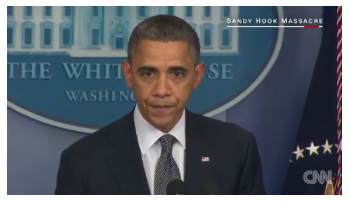

In [ ]:
# Carrega a matriz com a mascara da face em cada frame
mask = loadmat("faceMask.mat")['faceMask']

# Cria o objeto VideoCapture
vs = cv.VideoCapture("obama.mp4")

video = []

# Loop em todos os frames
while True:
  
  # Leitura do frame
  ret, frame = vs.read() 

  # Caso nao tenha mais nenhum frame
  if frame is None:
    break
  
  # Resize do frame para o tamanho da mascara
  frame = cv.resize(frame, (mask.shape[1],mask.shape[0]))

  # Coloca o frame lido na lista criada
  video.append(frame) 
  
vs.release()

# Cria uma np array com todos os frames (M=225, N=400, C=3, F=780)
video = np.stack(video, axis=3)

# Defina o codec e cria o objeto VideoWriter. A saída é armazenada no arquivo 'obama_out.mp4'.
out = cv.VideoWriter("obama_out.mp4",cv.VideoWriter_fourcc(*"MP4V"), 20.0, (video.shape[1],video.shape[0]))

# Loop em todos os frames
for i in range(mask.shape[2]):

  # Le a mascara do respectivo frame
  mask_frame = mask[:,:,i]

  # Le o frame
  frame = video[:,:,:,i] 

  # Calculo das coordenadas onde a face esta localizada
  rowInd = np.nonzero(np.abs(np.diff(np.sum(mask_frame, axis=1).T)))[0]
  colInd = np.nonzero(np.abs(np.diff(np.sum(mask_frame, axis=0).T)))[0]

  # Retira somente a face do frame
  frame_roi = frame[rowInd[0]:rowInd[1],colInd[0]:colInd[1],:]

  ## -- Seu código começa AQUI -- ##


  ## -- Seu código termina AQUI -- ##

  # Retorna a face filtrada para o frame
  frame[rowInd[0]:rowInd[1],colInd[0]:colInd[1],:] = np.uint8(frame_roi)

  # Escreve o frame no arquivo 
  out.write(frame)

out.release()

# Compressao do video gerado(Ref: https://stackoverflow.com/a/56589840/8682939)
os.system(f"ffmpeg -i obama_out.mp4 -vcodec libx264 obama_out_compressed.mp4")

plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB));
plt.axis('off');

In [ ]:
# Execute essa cécula caso queira ver o resultado.
mp4 = open('obama_out_compressed.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video controls><source src="%s" type="video/mp4"></video>""" % data_url)

<center>
<video width="620" height="440" src="images/conv_kiank.mp4" type="video/mp4" controls>
</video>
</center>
